### Problem Statement
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

 

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

 

And this is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.  The datasets containing those socio-economic factors and the corresponding data dictionary are provided below.

#### Read and Visualize the data

In [1]:
#Importing useful libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.preprocessing import scale
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
# Reading the dataset
df = pd.read_csv("Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df.shape

(167, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

Insights:
Data set has no null-values

In [6]:
df.describe(include = 'all')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
unique,167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,NaN,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,NaN,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,NaN,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,NaN,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,NaN,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000


In [7]:
#exports, imports, and health columns are percentage of gdpp, converting it into absolute values
df['exports'] = df['exports']*df['gdpp']/100
df['imports'] = df['imports']*df['gdpp']/100
df['health'] = df['health']*df['gdpp']/100

# EDA: Univariate and Bivariate

In [8]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [9]:
col = list(df.columns)
col

['country',
 'child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

In [10]:
col = col[1:]
col

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

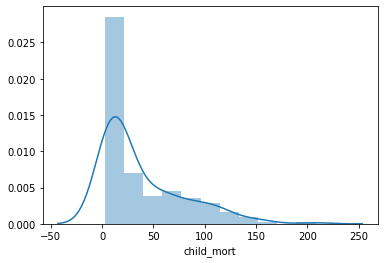

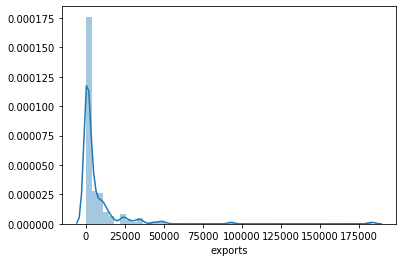

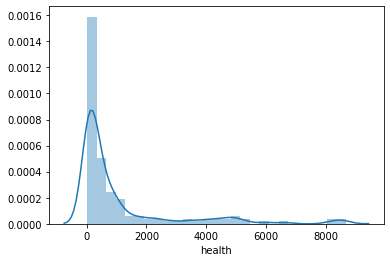

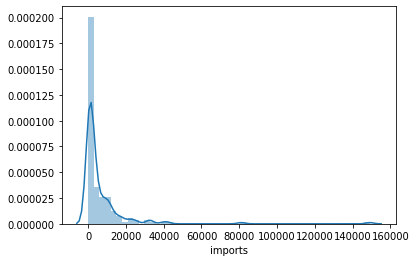

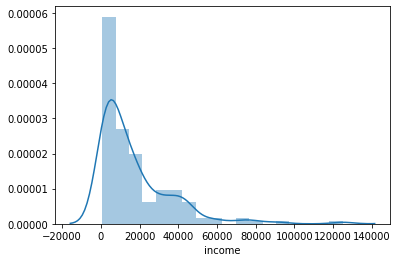

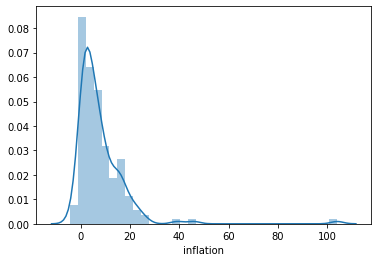

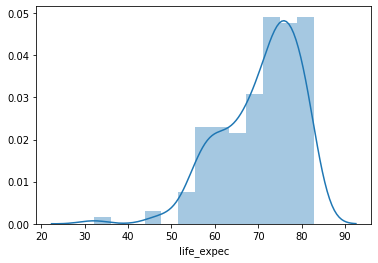

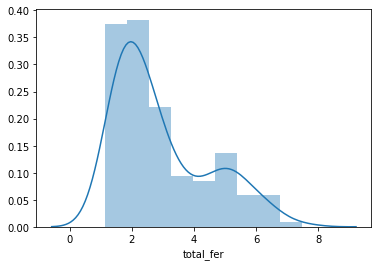

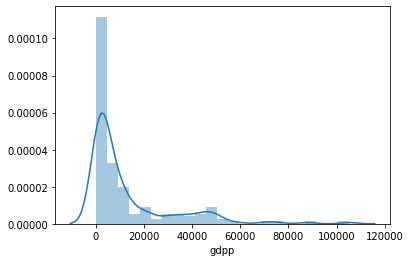

In [11]:
# Distribution of the columns
for c in col:
    sns.distplot(df[c])
    plt.show()

Insights:
In GDPP, INCOME, CHILD_MORT columns, there are higher chances for internal grouping

In [12]:
df[col].corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.297230,-0.430438,-0.319138,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.297230,1.000000,0.612919,0.987686,0.725351,-0.141553,0.377694,-0.291096,0.768894
health,-0.430438,0.612919,1.000000,0.638581,0.690857,-0.253956,0.545626,-0.407984,0.916593
imports,-0.319138,0.987686,0.638581,1.000000,0.672056,-0.179458,0.397515,-0.317061,0.755114
income,-0.524315,0.725351,0.690857,0.672056,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.141553,-0.253956,-0.179458,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.377694,0.545626,0.397515,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.291096,-0.407984,-0.317061,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.768894,0.916593,0.755114,0.895571,-0.221631,0.600089,-0.454910,1.000000


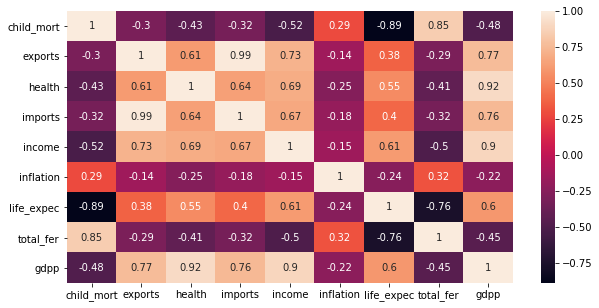

In [13]:
plt.figure(figsize=(10,5))
sns.heatmap(df[col].corr(), annot=True)

Insights:

1. Columns child_mort and total_fer are highly correlated with correlation of 0.85
2. Columns life_expec and child_mort are highly correlated with correlation of -0.89
3. Columns imports and exports are highly correlated with correlation of 0.99
4. total_fer and life_expec are highly correlated with correlation of -0.76

# Outliers

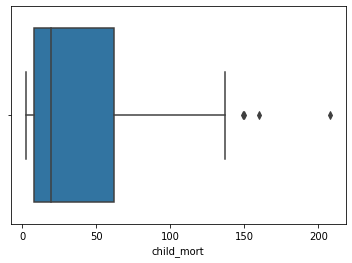

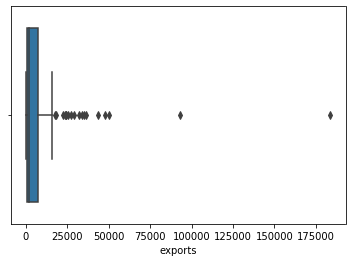

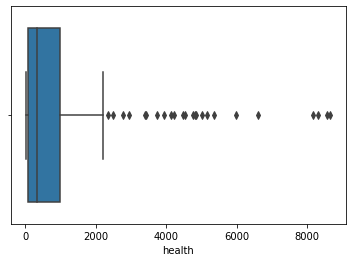

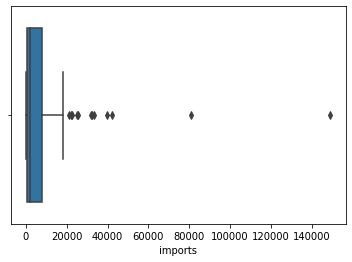

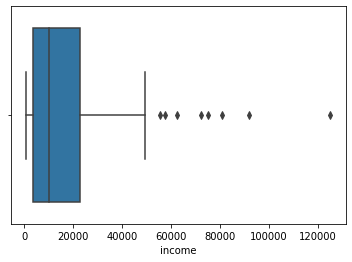

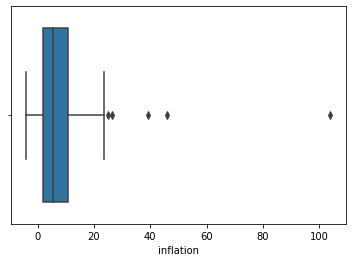

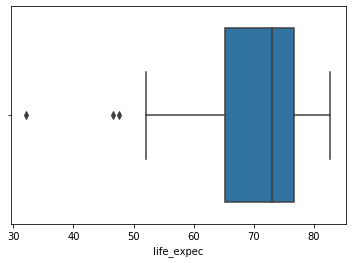

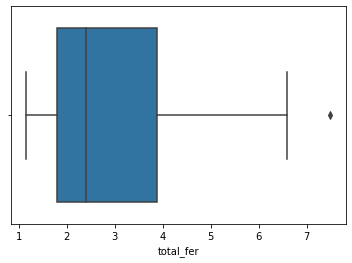

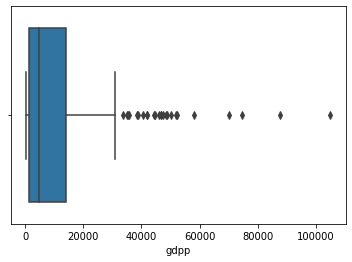

In [14]:
for c in col:
    sns.boxplot(df[c])
    plt.show()

Number of rows is very less in numbers so instead of removing outliers performing soft capping i.e If value is greater than or equal to  99% percentile then redefine the value as the value of 99% percentile; similarly if value less than or equal to  1% percentile then redefine value as the value of 1% percentile.

In [15]:
#Soft capping
col = list(df.columns)
col = col[1:]
for c in col:
    percentiles = df[c].quantile([0.01,0.99]).values
    df[c][df[c] <= percentiles[0]] = percentiles[0]
    df[c][df[c] >= percentiles[1]] = percentiles[1]

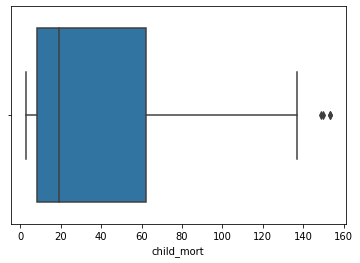

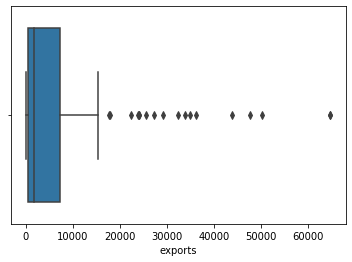

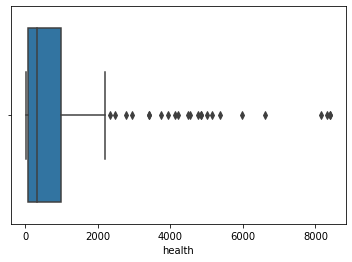

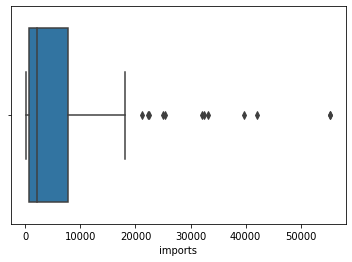

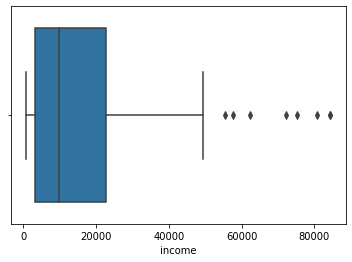

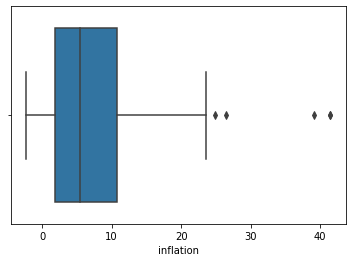

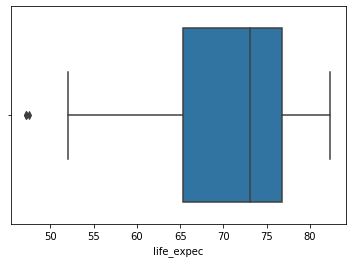

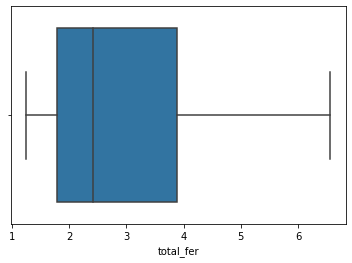

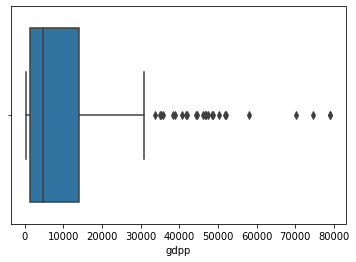

In [16]:
for c in col:
    sns.boxplot(df[c])
    plt.show()

In [17]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [18]:
# How different your date is from the randomly scattered data?

hopkins(df.drop('country', axis=1))

0.9038719240103238

Insights:
if the value is between 0.7 and 0.99 then it has a high tendency to cluster.The more the dataset is different from the random distribution, the better it is for performing Clustering.
in this case value is 0.91 that is it is 91 percente different from random data set so it is good for clustering

# Scaling

StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation

In [19]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
df_new = s.fit_transform(df.drop('country', axis=1))

In [20]:
df_new = pd.DataFrame(df_new)
df_new.head()

,0,1,2,3,4,5,6,7,8
0,1.344012,-0.569638,-0.566983,-0.598844,-0.851772,0.263649,-1.693799,1.926928,-0.702314
1,-0.547543,-0.473873,-0.440417,-0.413679,-0.387025,-0.375251,0.663053,-0.865911,-0.498775
2,-0.272548,-0.424015,-0.486295,-0.476198,-0.221124,1.123260,0.686504,-0.035427,-0.477483
3,2.084186,-0.381264,-0.534113,-0.464070,-0.612136,1.936405,-1.236499,2.154642,-0.531000
4,-0.709457,-0.086754,-0.178431,0.139659,0.125202,-0.768917,0.721681,-0.544433,-0.032079


In [21]:
df_new.columns = col

In [22]:
df_new.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.344012,-0.569638,-0.566983,-0.598844,-0.851772,0.263649,-1.693799,1.926928,-0.702314
1,-0.547543,-0.473873,-0.440417,-0.413679,-0.387025,-0.375251,0.663053,-0.865911,-0.498775
2,-0.272548,-0.424015,-0.486295,-0.476198,-0.221124,1.123260,0.686504,-0.035427,-0.477483
3,2.084186,-0.381264,-0.534113,-0.464070,-0.612136,1.936405,-1.236499,2.154642,-0.531000
4,-0.709457,-0.086754,-0.178431,0.139659,0.125202,-0.768917,0.721681,-0.544433,-0.032079


## Finding the Optimal Number of Clusters SSD Elbow

### SSD means sum of squared distances

In [23]:
ssd = []
for i in range(2,9):
    kmeans = KMeans(n_clusters= i , max_iter=50)
    kmeans.fit(df_new)
    
    ssd.append(kmeans.inertia_)
    
ssd

[840.5078797502679,
 547.793998743308,
 434.2463189325476,
 374.91833456180404,
 334.7030878945377,
 301.5542554697246,
 274.7400300659274]

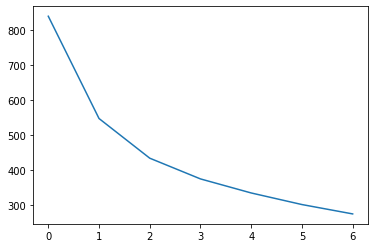

In [24]:
plt.plot(ssd)

Insights:
while  increasing the number of clusters  squared sum of distance  always decrease but not significantly and in our case while going 2 to 3 ssd drop very significantly after that rate of drop is reduced or can say slope is reduced so we choose number of clusters = 3

# Silhoutte Score

In [25]:
# silhouette analysis
for i in range(2,9):
    
    # intialise kmeans
    kmeans = KMeans(n_clusters= i , max_iter=50)
    kmeans.fit(df_new)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    avg = silhouette_score(df_new, cluster_labels)
    print("n_clusters={0}, silhouette score is {1}".format(i, avg))
    

n_clusters=2, silhouette score is 0.46939980287788113
n_clusters=3, silhouette score is 0.40708993455880516
n_clusters=4, silhouette score is 0.39539142309551445
n_clusters=5, silhouette score is 0.3700893262840813
n_clusters=6, silhouette score is 0.3059923231620247
n_clusters=7, silhouette score is 0.3152896527635921
n_clusters=8, silhouette score is 0.3244432351637282


Insights:
The value of the silhouette score range lies between -1 to 1. and A score closer to 1 indicates that the data point is very similar to other data points in the cluster,in our case silhouete score is almost same for all values between 2 to 6, but will choose number of clusters is 3 as elbow curve also tells the same

# Kmeans analysis for Final value k = 3

In [26]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df_new)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [27]:
#Centroid values for the final clusters
kmeans.cluster_centers_

array([[ 1.34749254, -0.49725446, -0.52608487, -0.53720606, -0.72379806,
         0.41448121, -1.29898722,  1.35913998, -0.6241439 ],
       [-0.44608365, -0.26896584, -0.29423633, -0.24319265, -0.17060836,
        -0.03429503,  0.32222783, -0.46902602, -0.28478671],
       [-0.84593495,  1.65776344,  1.78390839,  1.64390447,  1.72748481,
        -0.57960501,  1.15003041, -0.79401299,  1.91688659]])

In [28]:
kmeans.labels_

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 2, 0, 0, 1, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [29]:
# Adding new cloumn labels
df['labels'] = kmeans.labels_

In [30]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


In [31]:
df['labels'].value_counts()

1    90
0    48
2    29
Name: labels, dtype: int64

# Visualization using scatterplot

Columns gdpp, income, and child_mort has higher chances of internal grouping

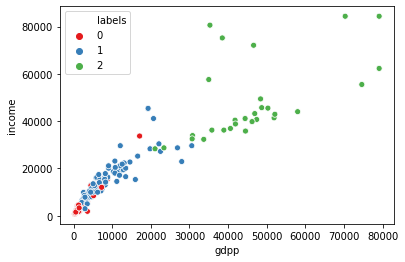

In [32]:
sns.scatterplot(x='gdpp', y='income', hue= 'labels', data=df, palette='Set1')

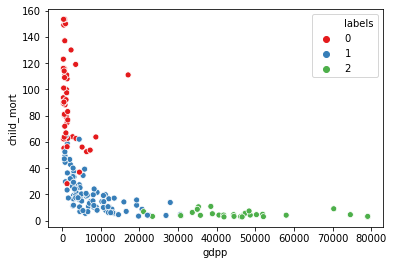

In [33]:
sns.scatterplot(x='gdpp', y='child_mort', hue= 'labels', data=df, palette='Set1')

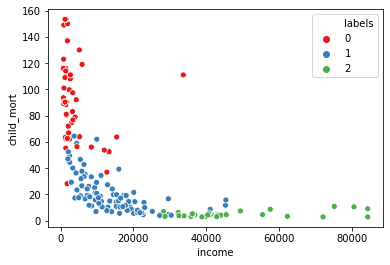

In [34]:
sns.scatterplot(x='income', y='child_mort', hue= 'labels', data=df, palette='Set1')

# Perform Cluster profiling

We are required to find one such cluster that is having LOW GDPP, LOW INCOME and HIGH CHILD_MORT.

In [35]:
df[['gdpp','income','child_mort','labels']].groupby('labels').mean()

,gdpp,income,child_mort
labels,,,
0,1911.400833,3901.010000,90.335417
1,7808.577778,13804.333333,20.547778
2,46068.137931,47784.413793,4.989655


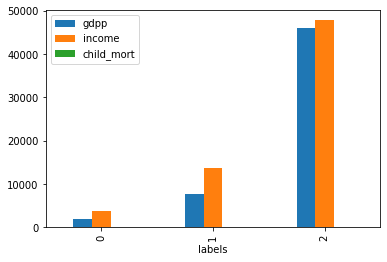

In [36]:
df[['gdpp','income','child_mort','labels']].groupby('labels').mean().plot(kind= 'bar')

Insights:
cluster 0 has higher probability to LOW GDPP, LOW INCOME and HIGH CHILD_MORT.

In [37]:
c0 = df[df['labels']==0]
c0

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,Afghanistan,90.2,55.300000,41.917400,248.29700,1610.00,9.440,56.20,5.8200,553.00,0
3,Angola,119.0,2199.190000,100.605000,1514.37000,5900.00,22.400,60.10,6.1600,3530.00,0
17,Benin,111.0,180.404000,31.078000,281.97600,1820.00,0.885,61.80,5.3600,758.00,0
21,Botswana,52.5,2768.600000,527.050000,3257.55000,13300.00,8.920,57.10,2.8800,6350.00,0
25,Burkina Faso,116.0,110.400000,38.755000,170.20000,1430.00,6.810,57.90,5.8700,575.00,0
26,Burundi,93.6,22.243716,26.796000,104.90964,764.00,12.300,57.70,6.2600,331.62,0
28,Cameroon,108.0,290.820000,67.203000,353.70000,2660.00,1.910,57.30,5.1100,1310.00,0
31,Central African Republic,149.0,52.628000,17.750800,118.19000,888.00,2.010,47.50,5.2100,446.00,0
32,Chad,150.0,330.096000,40.634100,390.19500,1930.00,6.390,56.50,6.5636,897.00,0
36,Comoros,88.2,126.885000,34.681900,397.57300,1410.00,3.870,65.90,4.7500,769.00,0


In [38]:
c0['labels'].value_counts()

0    48
Name: labels, dtype: int64

we now need to find the countries which are in dire need of aid.
So, lets sort them in the descending order of importance.

In [39]:
c0.sort_values(by=['gdpp', 'income', 'child_mort'], ascending= [True, True, False]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
88,Liberia,89.3,62.457000,38.586000,302.80200,742.24,5.47,60.8,5.0200,331.62,0
26,Burundi,93.6,22.243716,26.796000,104.90964,764.00,12.30,57.7,6.2600,331.62,0
37,"Congo, Dem. Rep.",116.0,137.274000,26.419400,165.66400,742.24,20.80,57.5,6.5400,334.00,0
112,Niger,123.0,77.256000,17.956800,170.86800,814.00,2.55,58.8,6.5636,348.00,0
132,Sierra Leone,153.4,67.032000,52.269000,137.65500,1220.00,17.20,55.0,5.2000,399.00,0
93,Madagascar,62.2,103.250000,17.009362,177.59000,1390.00,8.79,60.8,4.6000,413.00,0
106,Mozambique,101.0,131.985000,21.829900,193.57800,918.00,7.64,54.5,5.5600,419.00,0
31,Central African Republic,149.0,52.628000,17.750800,118.19000,888.00,2.01,47.5,5.2100,446.00,0
94,Malawi,90.5,104.652000,30.248100,160.19100,1030.00,12.10,53.1,5.3100,459.00,0
50,Eritrea,55.2,23.087800,17.009362,112.30600,1420.00,11.60,61.7,4.6100,482.00,0


# Final list of Countries:
Liberia,
Burundi,
Congo, DEm.Rep.,
Niger,
Sierra Leone

# Hierarchial Clustering: Single linkage, Complete Linkage

In [40]:
df_new.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.344012,-0.569638,-0.566983,-0.598844,-0.851772,0.263649,-1.693799,1.926928,-0.702314
1,-0.547543,-0.473873,-0.440417,-0.413679,-0.387025,-0.375251,0.663053,-0.865911,-0.498775
2,-0.272548,-0.424015,-0.486295,-0.476198,-0.221124,1.123260,0.686504,-0.035427,-0.477483
3,2.084186,-0.381264,-0.534113,-0.464070,-0.612136,1.936405,-1.236499,2.154642,-0.531000
4,-0.709457,-0.086754,-0.178431,0.139659,0.125202,-0.768917,0.721681,-0.544433,-0.032079


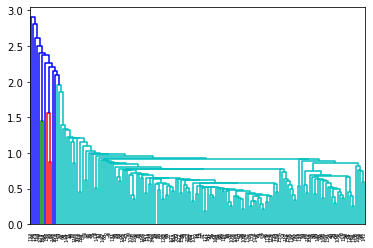

In [41]:
# single linkage
a = linkage(df_new, method="single", metric='euclidean')
dendrogram(a)
plt.show()

Insights:
From above dendogram hard to determine the value of k as data points are too close.

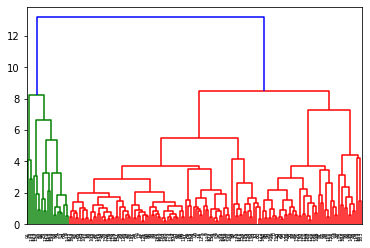

In [42]:
# complete linkage
a = linkage(df_new, method="complete", metric='euclidean')
dendrogram(a)
plt.show()

Insights:
Dissimilarity of clusters found at distance 8 so we will get k = 3

In [43]:
# 3 clusters
h_labels = cut_tree(a, n_clusters=3).reshape(-1, )
h_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       2, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0])

In [44]:
# Assigning  cluster labels
df['h_labels'] = h_labels
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels,h_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1,1


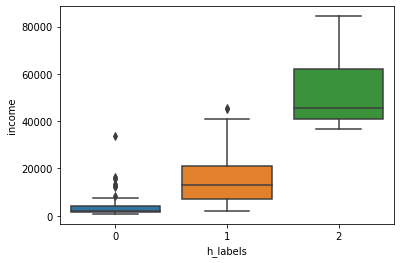

In [45]:
sns.boxplot(x='h_labels', y='income', data=df)

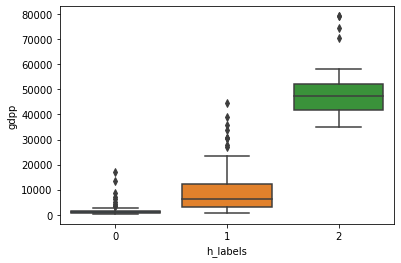

In [46]:
sns.boxplot(x='h_labels', y='gdpp', data=df)

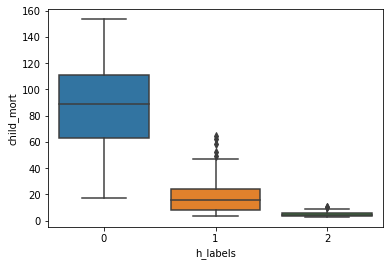

In [47]:
sns.boxplot(x='h_labels', y='child_mort', data=df)

Insights:
We can notice 3 clusters with different characterstics and cluster 0 has low gdpp, low income and high child mortality

In [48]:
c0 = df[df['h_labels']==0]
c0.sort_values(by=['gdpp', 'income', 'child_mort'], ascending= [True, True, False]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels,h_labels
88,Liberia,89.3,62.457000,38.586000,302.80200,742.24,5.47,60.8,5.0200,331.62,0,0
26,Burundi,93.6,22.243716,26.796000,104.90964,764.00,12.30,57.7,6.2600,331.62,0,0
37,"Congo, Dem. Rep.",116.0,137.274000,26.419400,165.66400,742.24,20.80,57.5,6.5400,334.00,0,0
112,Niger,123.0,77.256000,17.956800,170.86800,814.00,2.55,58.8,6.5636,348.00,0,0
132,Sierra Leone,153.4,67.032000,52.269000,137.65500,1220.00,17.20,55.0,5.2000,399.00,0,0
93,Madagascar,62.2,103.250000,17.009362,177.59000,1390.00,8.79,60.8,4.6000,413.00,0,0
106,Mozambique,101.0,131.985000,21.829900,193.57800,918.00,7.64,54.5,5.5600,419.00,0,0
31,Central African Republic,149.0,52.628000,17.750800,118.19000,888.00,2.01,47.5,5.2100,446.00,0,0
94,Malawi,90.5,104.652000,30.248100,160.19100,1030.00,12.10,53.1,5.3100,459.00,0,0
50,Eritrea,55.2,23.087800,17.009362,112.30600,1420.00,11.60,61.7,4.6100,482.00,0,0


# Final list of Countries:
    
1. Liberia
2. Burundi
3. Congo, DEm.Rep.
4. Niger 
5. Sierra Leone